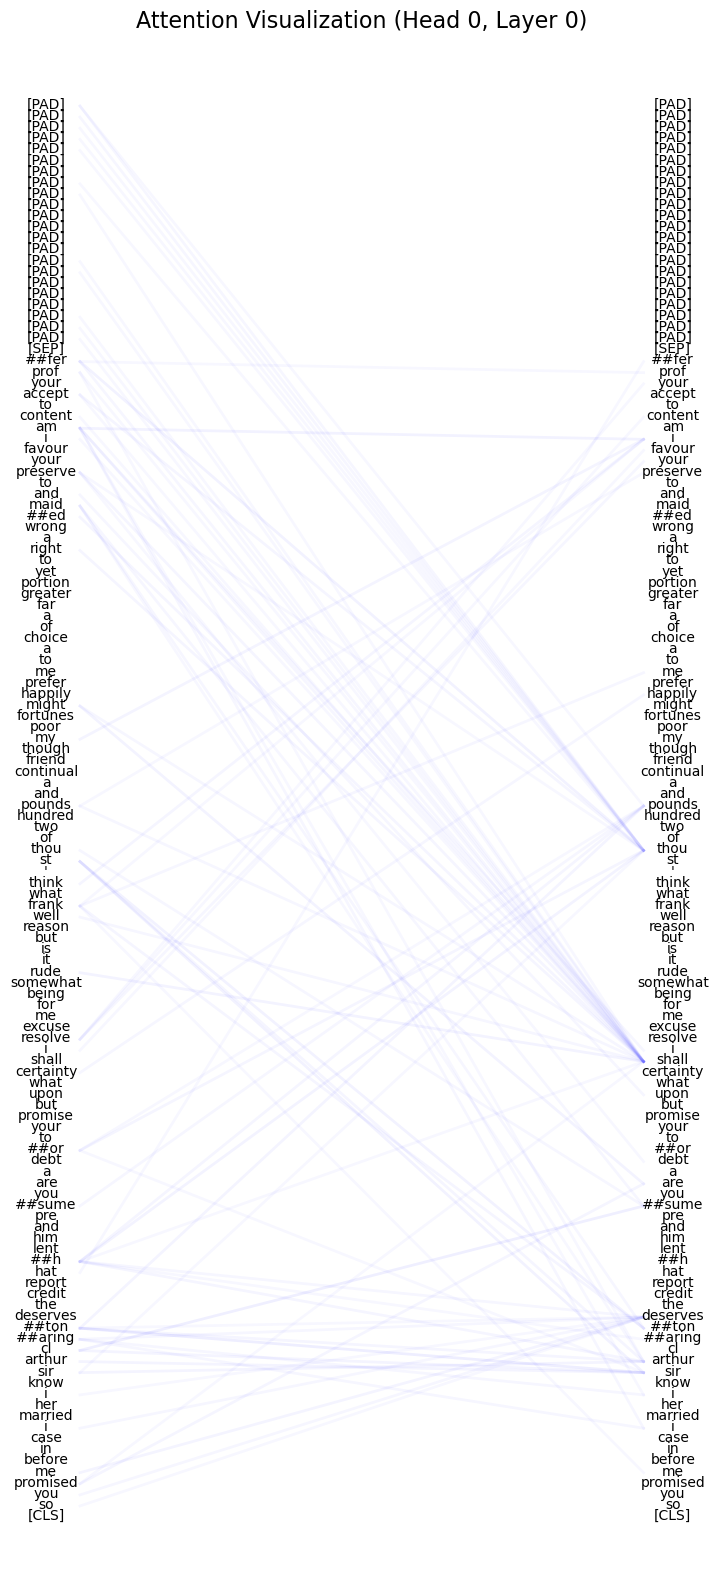

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load attention data
with open('attention_data.json', 'r') as file:
    attention_data = json.load(file)

# Head 0, Layer 0
head = 0
layer = 0

# Attention matrix to visualize
attention_matrix = np.array(attention_data[head][layer])

# Token sequence
tokens = ['[CLS]', 'so', 'you', 'promised', 'me', 'before', 'in', 'case', 'i', 'married', 'her', 'i', 'know', 
          'sir', 'arthur', 'cl', '##aring', '##ton', 'deserves', 'the', 'credit', 'report', 'hat', '##h', 'lent', 
          'him', 'and', 'pre', '##sume', 'you', 'are', 'a', 'debt', '##or', 'to', 'your', 'promise', 'but', 
          'upon', 'what', 'certainty', 'shall', 'i', 'resolve', 'excuse', 'me', 'for', 'being', 'somewhat', 'rude', 
          'it', 'is', 'but', 'reason', 'well', 'frank', 'what', 'think', "'", 'st', 'thou', 'of', 'two', 'hundred', 
          'pounds', 'and', 'a', 'continual', 'friend', 'though', 'my', 'poor', 'fortunes', 'might', 'happily', 
          'prefer', 'me', 'to', 'a', 'choice', 'of', 'a', 'far', 'greater', 'portion', 'yet', 'to', 'right', 'a', 
          'wrong', '##ed', 'maid', 'and', 'to', 'preserve', 'your', 'favour', 'i', 'am', 'content', 'to', 'accept', 
          'your', 'prof', '##fer', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', 
          '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', 
          '[PAD]', '[PAD]']

# We can adjust this as needed
threshold = 0.03

plt.figure(figsize=(8, 20))
spacing = 5 # Space between tokens in the graph

# Set y-positions (same for keys and queries)
y = np.linspace(0, len(tokens) - 1, len(tokens)) * spacing

# Plot tokens on left and right
for i, token in enumerate(tokens):
    plt.text(-1, y[i], token, ha='center', va='bottom', fontsize=10)

for i, token in enumerate(tokens):
    plt.text(len(tokens), y[i], token, ha='center', va='bottom', fontsize=10)

# Plot lines between queries and keys by iterating through attention matrix
for i in range(len(tokens)):
    for j in range(len(tokens)):
        if attention_matrix[i, j] > threshold:
            plt.plot([6, len(tokens) - 6], [y[i] + spacing/2, y[j] + spacing/2], color='blue', alpha=attention_matrix[i, j], lw=2)

plt.axis('off') # Don't plot axes
plt.title(f"Attention Visualization (Head {head}, Layer {layer})", fontsize=16)

plt.show()

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt


# Load attention data
with open('attention_data.json', 'r') as file:
   attention_data = json.load(file)
  
# want to look at last layer that does classification
layer = 11


average_attention_matrices = []


for i in range(np.shape(attention_data)[0]):
   matrix = np.array(attention_data[i][layer])
   average_attention_matrices.append(matrix)
attention_matrix = np.mean(average_attention_matrices, axis=0)
print(attention_matrix)


[[0.1326975  0.01295602 0.01206787 ... 0.         0.         0.        ]
 [0.15206259 0.03017144 0.02390351 ... 0.         0.         0.        ]
 [0.12381007 0.08558709 0.02037895 ... 0.         0.         0.        ]
 ...
 [0.09667349 0.00506457 0.00587283 ... 0.         0.         0.        ]
 [0.09399229 0.00580795 0.00682704 ... 0.         0.         0.        ]
 [0.09841341 0.00646376 0.00736614 ... 0.         0.         0.        ]]


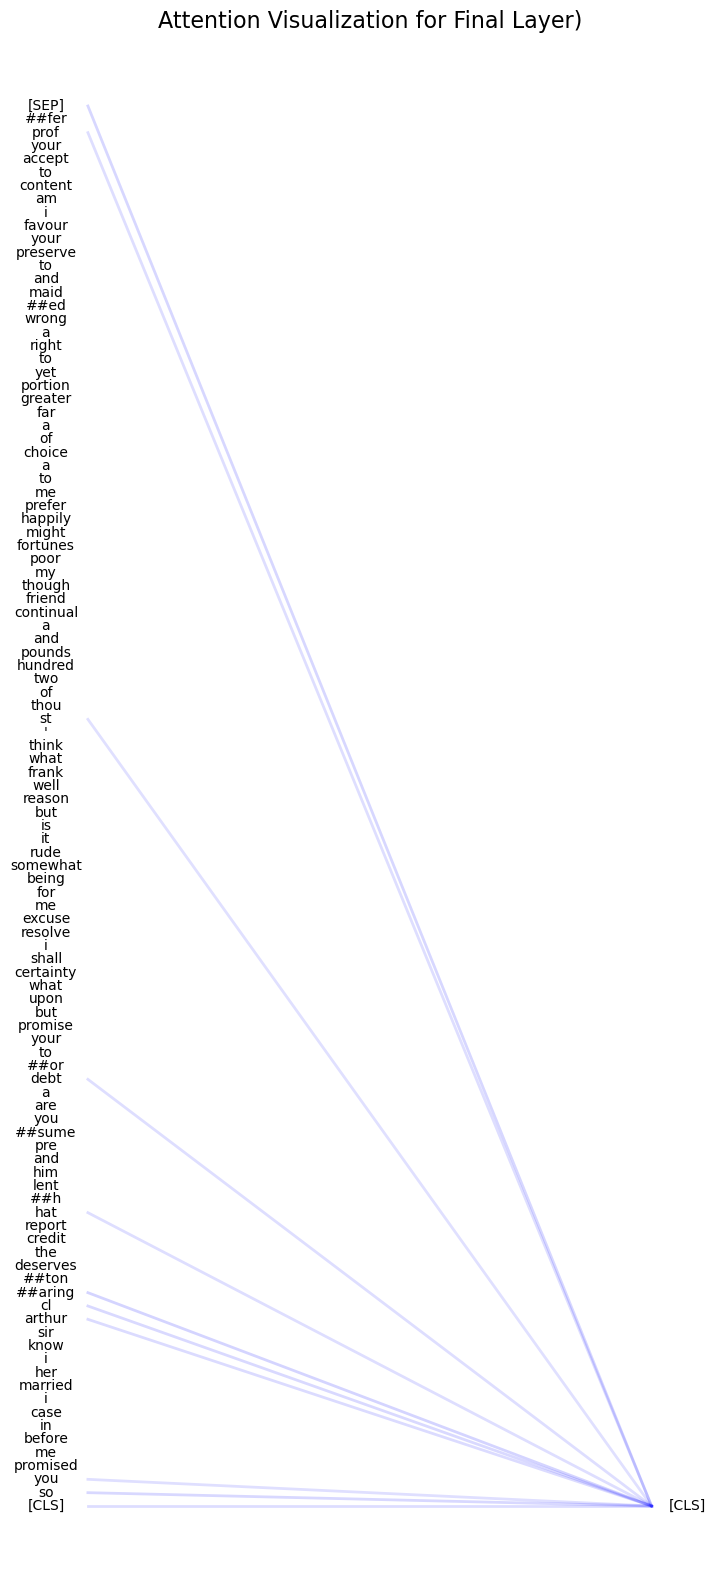

In [ ]:
# Token sequence
tokens = ['[CLS]', 'so', 'you', 'promised', 'me', 'before', 'in', 'case', 'i', 'married', 'her', 'i', 'know',
         'sir', 'arthur', 'cl', '##aring', '##ton', 'deserves', 'the', 'credit', 'report', 'hat', '##h', 'lent',
         'him', 'and', 'pre', '##sume', 'you', 'are', 'a', 'debt', '##or', 'to', 'your', 'promise', 'but',
         'upon', 'what', 'certainty', 'shall', 'i', 'resolve', 'excuse', 'me', 'for', 'being', 'somewhat', 'rude',
         'it', 'is', 'but', 'reason', 'well', 'frank', 'what', 'think', "'", 'st', 'thou', 'of', 'two', 'hundred',
         'pounds', 'and', 'a', 'continual', 'friend', 'though', 'my', 'poor', 'fortunes', 'might', 'happily',
         'prefer', 'me', 'to', 'a', 'choice', 'of', 'a', 'far', 'greater', 'portion', 'yet', 'to', 'right', 'a',
         'wrong', '##ed', 'maid', 'and', 'to', 'preserve', 'your', 'favour', 'i', 'am', 'content', 'to', 'accept',
         'your', 'prof', '##fer', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
         '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]',
         '[PAD]', '[PAD]']


# Remove padding tokens
non_pad_indices = [i for i, token in enumerate(tokens) if token != '[PAD]']
filtered_tokens = [tokens[i] for i in non_pad_indices]
filtered_attention_matrix = attention_matrix[np.ix_(non_pad_indices, non_pad_indices)]
cls_index = filtered_tokens.index('[CLS]')


# We can adjust this as needed
threshold = 0.12


plt.figure(figsize=(8, 20))
spacing = 5  # Space between tokens in the graph


# Set y-positions (same for keys and queries)
y = np.linspace(0, len(filtered_tokens) - 1, len(filtered_tokens)) * spacing


# Plot tokens on left
for i, token in enumerate(filtered_tokens):
   plt.text(-1, y[i], token, ha='center', va='bottom', fontsize=10)
# Plot classification token on right
plt.text(len(filtered_tokens), y[cls_index], '[CLS]', ha='center', va='bottom', fontsize=10)


# Plot lines between queries and keys by iterating through filtered attention matrix
for i in range(len(filtered_tokens)):
   if filtered_attention_matrix[i, cls_index] > threshold:
       plt.plot([6, len(filtered_tokens) - 6], [y[i] + spacing/2, y[cls_index] + spacing/2], color='blue', alpha=filtered_attention_matrix[i, cls_index], lw=2)


plt.axis('off')  # Don't plot axes
plt.title(f"Attention Visualization for Final Layer", fontsize=16)


plt.show()